In [1]:
import os

run_folder = os.environ["DATA"] + "/03_paper_popalg/05_guacamol/v2/12_3_basic_act/"

run_name = "prim act"

figsize = (20, 10)
xlim_violin = (0, 1.3)
xlim_boxplot = (0, 1.1)

In [2]:
import pandas as pd
from os.path import join
import json

from IPython.display import display, HTML


def extract_data(run_folder, run_name):
    
    values = {}
    values["run"] = []
    values["benchmark"] = []
    values["score"] = []

    for i in range(1, 11):
        filename = join(run_folder, "output_v2_" + str(i) + ".json")
        with open(filename, "r") as f:
            j_obj = json.loads(f.read())
            for result in j_obj["results"]:

                key = result["benchmark_name"]

                values["score"].append(result["score"])
                values["run"].append(run_name)
                values["benchmark"].append(key)

    df_results = pd.DataFrame.from_dict(values)
    
#     display(HTML(df_results.to_html()))

    return df_results
    

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def plot(run_folder, run_name, figsize, plot_type, xlim=None):
    
    df_results = extract_data(run_folder, run_name)
    
    plt.figure(figsize=figsize)
    
    if xlim is not None:
        plt.xlim(xlim)
    
    if plot_type == "violin":
        sns.violinplot(x="score", y="benchmark", data=df_results, hue="run")
        plt.gca().legend().remove()
    elif plot_type == "boxplot":
        sns.boxplot(x="score", y="benchmark", data=df_results, hue="run")
        plt.gca().legend().remove()
        
    


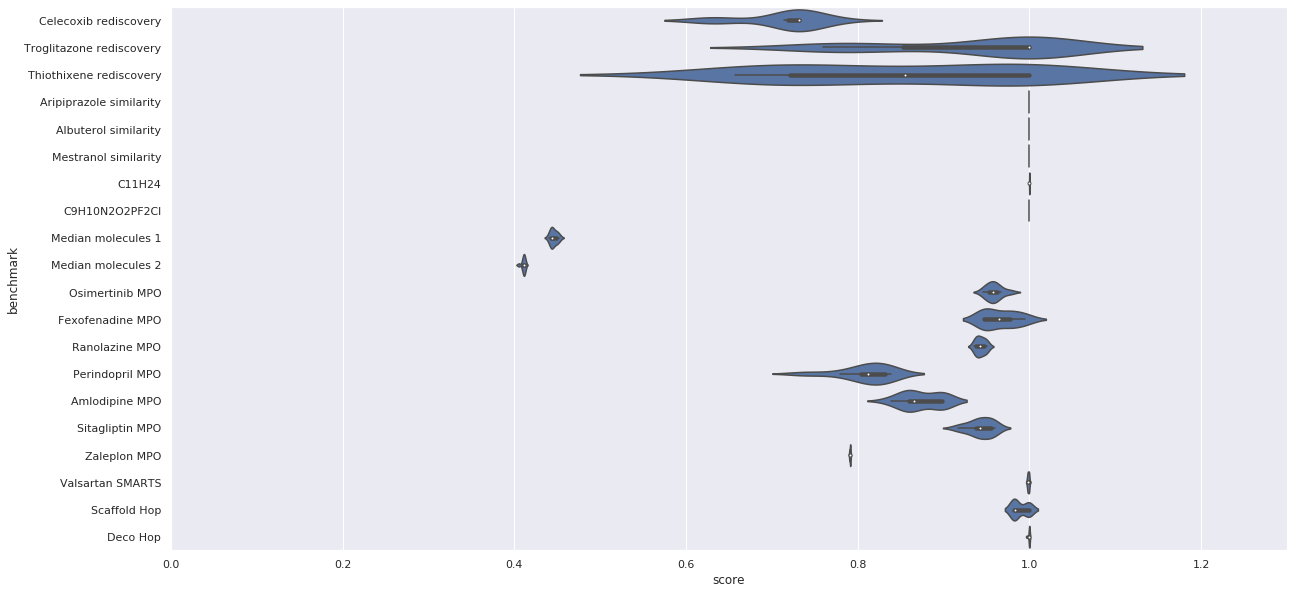

In [4]:
plot(run_folder, run_name, figsize, "violin", xlim=xlim_violin)

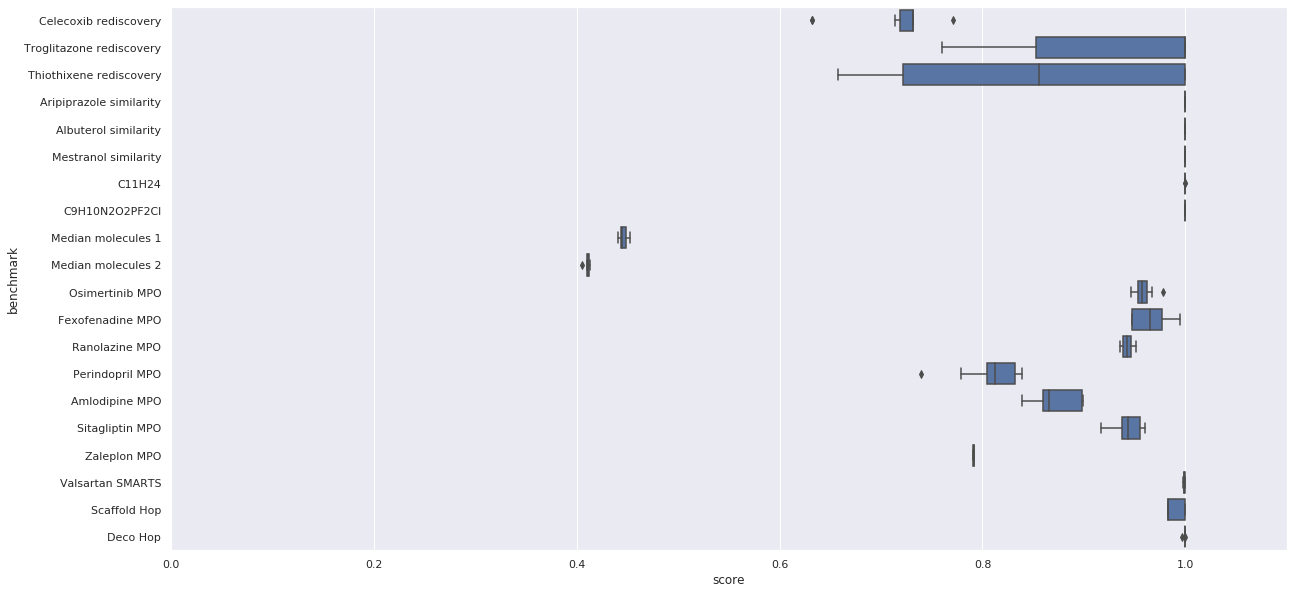

In [5]:
plot(run_folder, run_name, figsize, "boxplot", xlim=xlim_boxplot)